<a href="https://colab.research.google.com/github/CengARY/DataGlacier_Healthcare_Persistency_of_a_drug/blob/main/Drug_Persistency_LastFile_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 5)

In [67]:
df = pd.read_excel(r'Healthcare_dataset.xlsx', sheet_name="Dataset")

In [68]:
df.head(5)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [69]:
df.shape

(3424, 69)

In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [71]:
cat_v = list(df.select_dtypes(object).columns)
cat_v

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_S

In [72]:
num_v = list(df.select_dtypes(['int64']).columns)
num_v

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

In [73]:
num_v = df.select_dtypes(["int64"])
#pd.set_option('display.max_rows', None)
num_v.head()


,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,0
1,0,0
2,0,2
3,0,1
4,0,1


In [74]:
num_v = df.select_dtypes(["int64"])
#pd.set_option('display.max_rows', None)
#num_v
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [75]:
num_v.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [76]:
num_v.max()

Dexa_Freq_During_Rx    146
Count_Of_Risks           7
dtype: int64

In [77]:
num_v.min()

Dexa_Freq_During_Rx    0
Count_Of_Risks         0
dtype: int64

AttributeError: ignored

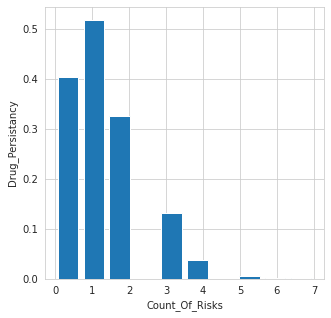

In [78]:
from scipy.stats import norm

plt.hist(num_v.Count_Of_Risks, bins= 10, rwidth= 0.8, density=True)
plt.xlabel('Count_Of_Risks')
plt.ylabel('Drug_Persistancy')

rng=np.arange(num_v.Count_Of_Risks.min(), num_v.Count_Of_Risks.max(), 0.1)
plt.plot(rng, norm.pnum_v(rng,Count_Of_Risks.mean(), num_v.Count_Of_Risks.std()))

In [79]:
num_v.mean()

Dexa_Freq_During_Rx    3.016063
Count_Of_Risks         1.239486
dtype: float64

In [80]:
num_v.std()

Dexa_Freq_During_Rx    8.136545
Count_Of_Risks         1.094914
dtype: float64

In [81]:
upper_limit = num_v.mean() + 3*num_v.std()
upper_limit

Dexa_Freq_During_Rx    27.425698
Count_Of_Risks          4.524229
dtype: float64

In [82]:
lower_limit = num_v.mean() - 3*num_v.std()
lower_limit

Dexa_Freq_During_Rx   -21.393572
Count_Of_Risks         -2.045257
dtype: float64

In [85]:
num_v[(num_v>upper_limit) | (num_v<lower_limit)]
num_v.head()

,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,0
1,0,0
2,0,2
3,0,1
4,0,1


In [86]:
nu = num_v[(num_v<upper_limit) & (num_v>lower_limit)]
nu.head()

,Dexa_Freq_During_Rx,Count_Of_Risks
0,0.0,0.0
1,0.0,0.0
2,0.0,2.0
3,0.0,1.0
4,0.0,1.0


In [87]:
df.shape[0] - nu.shape[0]

0

In [88]:
for col in num_v:
   print(col)
    
max_v1= df["Count_Of_Risks"].quantile(0.95)
min_v1= df["Count_Of_Risks"].quantile(0.05)

max_v2=df["Dexa_Freq_During_Rx"].quantile(0.95)
min_v2=df["Dexa_Freq_During_Rx"].quantile(0.05)

print(max_v1)
print(min_v1)
print(max_v2)
print(min_v2)

Dexa_Freq_During_Rx
Count_Of_Risks
3.0
0.0
14.0
0.0


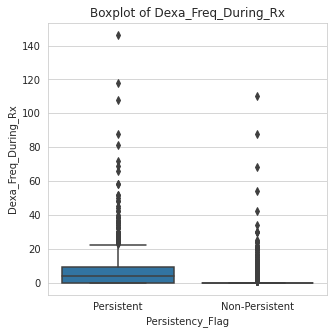

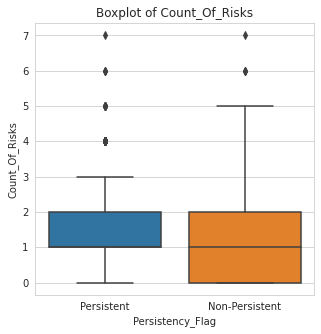

In [89]:
#Outliers
def boxplot(df, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(x='Persistency_Flag', y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(df, num_v)

Dexa_Freq_During_Rx
6.805747051718919


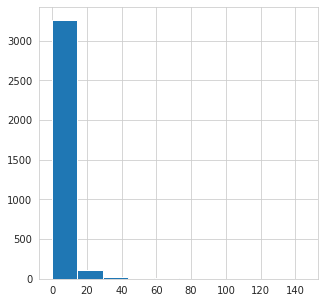

Count_Of_Risks
0.8794050541279611


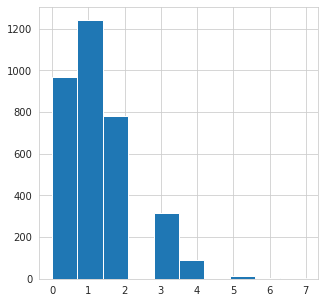

In [90]:
from scipy.stats import skew
for col in num_v:
    print(col)
    print(skew(num_v[col]))
    
    plt.figure()
    plt.hist(num_v[col])
   
    plt.show()

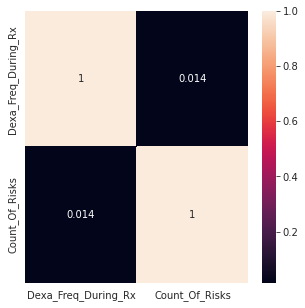

In [91]:
sns.heatmap(num_v.corr(), annot=True)
plt.show()

In [92]:
num_v["Dexa_Freq_During_Rx"]= np.sqrt(num_v["Dexa_Freq_During_Rx"])

<ipython-input-92-2941d1f1c6b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_v["Dexa_Freq_During_Rx"]= np.sqrt(num_v["Dexa_Freq_During_Rx"])


In [93]:
skew(num_v["Dexa_Freq_During_Rx"])

1.991622262348268

In [94]:
num_v["Count_Of_Risks"]= np.sqrt(num_v["Count_Of_Risks"])

<ipython-input-94-626a7ab62ef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_v["Count_Of_Risks"]= np.sqrt(num_v["Count_Of_Risks"])


In [95]:
skew(num_v["Count_Of_Risks"])

-0.32745539912302396

In [96]:
np.log(-1)

<ipython-input-96-0cd3490738d5>:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

In [64]:
df.to_excel(r"Healthcare_dataset_modified.xlsx")